**REGRESIÓN LINEAL**

La regresión lineal es una técnica estadística que se utiliza para modelar la relación entre una variable dependiente y una o más variables independientes. El objetivo de la regresión lineal es encontrar una línea recta que mejor represente la relación entre estas variables.

**Regresión lineal simple:** Este tipo de regresión lineal involucra solo dos variables, una variable independiente y una variable dependiente. La relación entre las dos variables se modela mediante una línea recta.

Supongamos que se tiene un conjunto de datos que muestra la cantidad de tiempo que los estudiantes pasan estudiando y sus calificaciones en un examen. El objetivo es determinar si hay una relación lineal entre el tiempo de estudio y las calificaciones, y si es así, utilizar la regresión lineal para predecir las calificaciones de un estudiante en función del tiempo que pasan estudiando.

Primero, se deben importar las bibliotecas necesarias y cargar los datos en un DataFrame de Pandas:

In [1]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

In [5]:
import glob

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# Ruta a la carpeta en Google Drive
path = "/content/drive/MyDrive/Datas Creadas 10"

In [6]:
csv_files = glob.glob(path + "/*.csv")
csv_files

['/content/drive/MyDrive/Datas Creadas 10/Datos_Estudiantes_Maicol Lojano.csv',
 '/content/drive/MyDrive/Datas Creadas 10/datos_estudiantes_victorcab.csv',
 '/content/drive/MyDrive/Datas Creadas 10/danny datos_estudiantes.csv',
 '/content/drive/MyDrive/Datas Creadas 10/datos_estudiantes_Jonnathan.csv',
 '/content/drive/MyDrive/Datas Creadas 10/datos_estudiantes_Ariel_Saquicela.csv',
 '/content/drive/MyDrive/Datas Creadas 10/datos_estudiantes_Carlos Astudillo.csv',
 '/content/drive/MyDrive/Datas Creadas 10/datos_estudiantes_Paul Rodriguez.csv',
 '/content/drive/MyDrive/Datas Creadas 10/datos_estudiantes_paula_gomez.csv',
 '/content/drive/MyDrive/Datas Creadas 10/datos_estudiantes_Jose_munoz.csv',
 '/content/drive/MyDrive/Datas Creadas 10/datos_estudiantes (1).csv']

In [7]:
dfs = [pd.read_csv(file) for file in csv_files]

In [8]:
combined_df = pd.concat(dfs, ignore_index=True)

In [10]:
combined_df.to_csv("Data_Unida", index=False)

In [12]:
data = pd.read_csv("/content/Data_Unida")
data

,Tiempo,Calificación,Calificacion
0,1,60.0,NaN
1,2,70.0,NaN
2,3,75.0,NaN
3,4,80.0,NaN
4,5,85.0,NaN
...,...,...,...
596,3,NaN,29.0
597,18,NaN,46.0
598,10,NaN,71.0
599,19,NaN,52.0


In [13]:
data.shape

(601, 3)

El archivo "datos_estudiantes.csv" contiene los datos de 10 estudiantes, que se presentan en la siguiente tabla:

Ahora se van a agregar 50 datos más a la lista

In [14]:
# visualizar los primeros registros
print(data)

     Tiempo  Calificación  Calificacion
0         1          60.0           NaN
1         2          70.0           NaN
2         3          75.0           NaN
3         4          80.0           NaN
4         5          85.0           NaN
..      ...           ...           ...
596       3           NaN          29.0
597      18           NaN          46.0
598      10           NaN          71.0
599      19           NaN          52.0
600      24           NaN          43.0

[601 rows x 3 columns]


A continuación, se deben separar las variables independientes (horas de estudio) de la variable dependiente (calificacion):

In [15]:
# separar las variables independientes y dependiente
X = data.iloc[:, :-1].values
y = data.iloc[:, 1].values

In [16]:
X

array([[ 1., 60.],
       [ 2., 70.],
       [ 3., 75.],
       ...,
       [10., nan],
       [19., nan],
       [24., nan]])

In [17]:
y

array([ 60.,  70.,  75.,  80.,  85.,  90.,  92.,  94.,  96.,  98.,  80.,
        85.,  90.,  92.,  94.,  96.,  98.,  60.,  70.,  75.,  80.,  60.,
        70.,  75.,  80.,  85.,  90.,  85.,  90.,  92.,  94.,  96.,  98.,
        80.,  70.,  71.,  60.,  61.,  66.,  70.,  80.,  81.,  76.,  88.,
        91.,  94., 100.,  62.,  65.,  75.,  71.,  60.,  61.,  66.,  70.,
        80.,  81.,  76.,  88.,  91.,  nan,  nan,  nan,  nan,  nan,  nan,
        nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,
        nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,
        nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,
        nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,
        nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  60.,
        70.,  75.,  80.,  85.,  90.,  92.,  94.,  96.,  98.,  60.,  50.,
        20.,  50.,  20.,  60.,  60.,  30.,  30.,  15.,  75.,  82.,  87.,
        91.,  78.,  89.,  94.,  81.,  76.,  93.,  2

Luego, se puede ajustar la línea de regresión utilizando el modelo de regresión lineal de Scikit-learn:

In [18]:
print(data.isna().sum())

Tiempo            0
Calificación    120
Calificacion    481
dtype: int64


In [19]:
# Separar X y y
X = data[['Tiempo']]
y = data['Calificación']

In [22]:
# ajustar el modelo de regresión lineal
regressor = LinearRegression()
# Drop rows with missing values in 'y'
y_no_nan = y.dropna()
X_no_nan = X.loc[y_no_nan.index] # Keep corresponding rows in X
regressor.fit(X_no_nan, y_no_nan)

LinearRegression()

Finalmente, se puede visualizar la línea de regresión y predecir la calificación del estudiante en función de las horas que estudia:

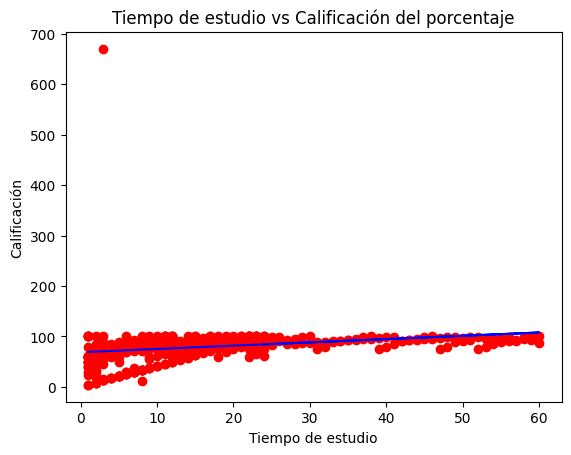

Calificación predicha: [74.01812057]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [23]:
# visualizar la línea de regresión
plt.scatter(X, y, color='red')
plt.plot(X, regressor.predict(X), color='blue')
plt.title('Tiempo de estudio vs Calificación del porcentaje')
plt.xlabel('Tiempo de estudio')
plt.ylabel('Calificación')
plt.show()

# predecir la calificación de un estudiante que invierte 6 horas de studio
horas_estudio = [[8]]
print("Calificación predicha:", regressor.predict(horas_estudio))

**EVALUACIÓN DEL MODELO**

Para evaluar la calidad de un modelo de regresión lineal, hay varias métricas que se pueden utilizar. Aquí se presentan algunas de las más comunes:

**1. Error cuadrático medio (MSE):** Esta métrica calcula el promedio de los errores al cuadrado entre las predicciones y los valores reales. Un MSE más bajo indica un mejor ajuste del modelo.

In [26]:
# Importa las bibliotecas necesarias
import pandas as pd
from sklearn.metrics import mean_squared_error

# Verifica si hay valores NaN en y
if pd.isna(y).any():
    print("Hay valores NaN en 'y'. Debes manejarlos antes de calcular el MSE.")
    # Aquí puedes optar por imputar los valores faltantes o eliminar las filas con NaN

# Verifica si hay valores NaN en y_pred
if pd.isna(y_pred).any():
    print("Hay valores NaN en 'y_pred'. Revisa tu modelo y datos de entrada.")

# Si no hay valores NaN, calcula el MSE
if not (pd.isna(y).any() or pd.isna(y_pred).any()):
    mse = mean_squared_error(y, y_pred)
    print("MSE:", mse)

Hay valores NaN en 'y'. Debes manejarlos antes de calcular el MSE.


**2. Coeficiente de determinación (R2):** Esta métrica mide la proporción de la varianza en la variable dependiente que se puede explicar por la variable independiente. Un R2 más alto indica un mejor ajuste del modelo.

In [28]:
# Importa las bibliotecas necesarias
import pandas as pd
from sklearn.metrics import mean_squared_error, r2_score

# ... (Your existing code to handle NaNs in 'y' and 'y_pred') ...

# Si no hay valores NaN, calcula el R2
if not (pd.isna(y).any() or pd.isna(y_pred).any()):
    r2 = r2_score(y, y_pred)
    print("R2:", r2)
else:
    print("Cannot calculate R2 due to NaN values in y or y_pred.")

Cannot calculate R2 due to NaN values in y or y_pred.


**3. Gráfico de residuos:** Un gráfico de residuos muestra la diferencia entre los valores reales y las predicciones en función de las variables independientes. Si las predicciones son precisas, los residuos deberían estar distribuidos aleatoriamente alrededor de cero. Si hay un patrón en los residuos, puede ser una indicación de que el modelo no está capturando completamente las relaciones entre las variables.

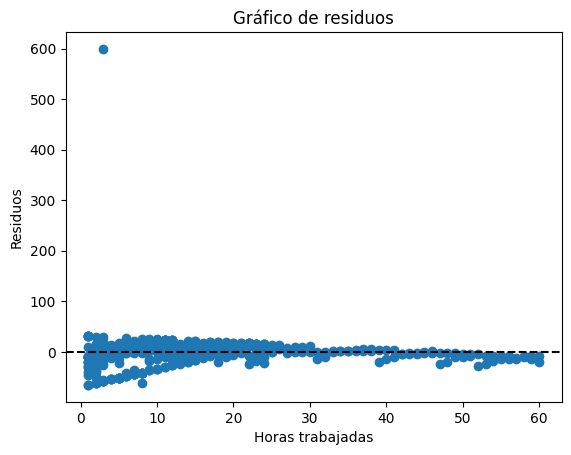

In [29]:
# crear un gráfico de residuos
residuos = y - y_pred
plt.scatter(X, residuos)
plt.axhline(y=0, color='black', linestyle='--')
plt.title('Gráfico de residuos')
plt.xlabel('Horas trabajadas')
plt.ylabel('Residuos')

plt.show()

Estas métricas pueden ayudar a evaluar la calidad de un modelo de regresión lineal y determinar si es adecuado para el conjunto de datos y el problema en cuestión. Es importante tener en cuenta que ninguna métrica por sí sola puede decir si un modelo es adecuado, por lo que se deben considerar varias métricas en conjunto.